In [262]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [140]:
df = pd.read_csv("Train.csv")

In [141]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [142]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [143]:
for col in df:
    print(f"Column: {col}\n{df[col].value_counts()}\n")

Column: country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

Column: year
2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

Column: uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64

Column: bank_account
No     20212
Yes     3312
Name: bank_account, dtype: int64

Column: location_type
Rural    14343
Urban     9181
Name: location_type, dtype: int64

Column: cellphone_access
Yes    17454
No      6070
Name: cellphone_access, dtype: int64

Column: household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64

Col

In [144]:
#coorelation between the numerical variables

df.corr()

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


<AxesSubplot:>

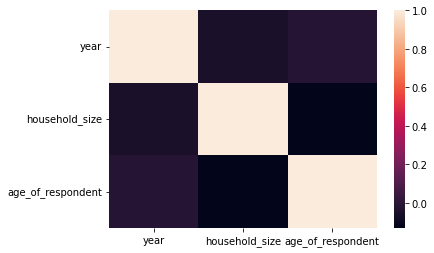

In [145]:
sns.heatmap(df.corr())

In [146]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [147]:
#frequency encoding for the "country" column

country_frequency = df["country"].value_counts()
df["country_frequency"] = df["country"].map(country_frequency)

#frequency encoding for the "marital_status" column

ms_frequency = df["marital_status"].value_counts()
df["ms_frequency"] = df["marital_status"].map(ms_frequency)

df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country_frequency,ms_frequency
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,6068,10749
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,6068,2708
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,6068,7983
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,6068,10749
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,6068,7983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,2101,2076
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,2101,7983
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,2101,2708
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,2101,2076


In [148]:
#oneHot Encoding for the "gender" column

encoder = OneHotEncoder(sparse=False)

encoded_features = encoder.fit_transform(df[["gender_of_respondent"]])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(['gender_of_respondent']))

df_encoded = pd.concat([df, encoded_df], axis=1)

#oneHot Encoding for the "relationship_with_head" column
encoded_features = encoder.fit_transform(df[["relationship_with_head"]])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(["relation"]))

df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,education_level,job_type,country_frequency,ms_frequency,relation_Child,relation_Head of Household,relation_Other non-relatives,relation_Other relative,relation_Parent,relation_Spouse
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,...,Secondary education,Self employed,6068,10749,0.0,0.0,0.0,0.0,0.0,1.0
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,...,No formal education,Government Dependent,6068,2708,0.0,1.0,0.0,0.0,0.0,0.0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,...,Vocational/Specialised training,Self employed,6068,7983,0.0,0.0,0.0,1.0,0.0,0.0
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,...,Primary education,Formally employed Private,6068,10749,0.0,1.0,0.0,0.0,0.0,0.0
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,...,Primary education,Informally employed,6068,7983,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,...,No formal education,Other Income,2101,2076,0.0,1.0,0.0,0.0,0.0,0.0
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,...,Secondary education,Other Income,2101,7983,0.0,1.0,0.0,0.0,0.0,0.0
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,...,Primary education,Other Income,2101,2708,0.0,0.0,0.0,0.0,1.0,0.0
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,...,Secondary education,Self employed,2101,2076,0.0,0.0,0.0,0.0,1.0,0.0


In [300]:
#ordinal mapping for "education_level" column

ordinal_mapping = {
    "Tertiary education": 1,
    "Secondary education": 2,
    "Primary education": 3,
    "Vocational/Specialised training": 4,
    "No formal education": 5,
    "Other/Dont know/RTA": 6
}

df_encoded['Education_Level_Encoded'] = df_encoded['education_level'].map(ordinal_mapping)

#ordinal mapping for "year" column 

ordinal_mapping1 = {
    2016: 1,
    2017: 2,
    2018: 3,
}

df_encoded["year_encoded"] = df_encoded["year"].map(ordinal_mapping1)

#ordinal mapping for "location_type" column
ordinal_mapping2 = {
    "Urban": 1,
    "Rural": 0,
}

df_encoded["location_type_encoded"] = df_encoded["location_type"].map(ordinal_mapping2)

#ordinal mapping for "cellphone_access" column
ordinal_mapping3 = {
    "Yes": 1,
    "No": 0,
}

df_encoded["cellphone_access_encoded"] = df_encoded["cellphone_access"].map(ordinal_mapping3)

#ordinal mapping for "job_type" column
ordinal_mapping4 = {
    "Formally employed Government": 1,
    "Formally employed Private": 2,
    "Government Dependent": 3,
    "Remittance Dependent": 3,
    "Farming and Fishing": 4,
    "Self employed": 4,
    "Informally employed": 4,
    "Other Income": 5,
    "No Income": 6,
    "Dont Know/Refuse to answer": 7
}

df_encoded["job_type_encoded"] = df_encoded["job_type"].map(ordinal_mapping4)

#ordinal mapping for "bank_account" column
ordinal_mapping5 = {
    "Yes": 1,
    "No": 0,
}
df_encoded["bank_account_encoded"] = df_encoded["bank_account"].map(ordinal_mapping5)

df_encoded

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,...,relation_Other non-relatives,relation_Other relative,relation_Parent,relation_Spouse,Education_Level_Encoded,year_encoded,location_type_encoded,cellphone_access_encoded,job_type_encoded,bank_account_encoded
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,...,0.0,0.0,0.0,1.0,2,3,0,1,4,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,...,0.0,0.0,0.0,0.0,5,3,0,0,3,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,...,0.0,1.0,0.0,0.0,4,3,1,1,4,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,...,0.0,0.0,0.0,0.0,3,3,0,1,2,0
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,...,0.0,0.0,0.0,0.0,3,3,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,...,0.0,0.0,0.0,0.0,5,3,0,1,5,0
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,...,0.0,0.0,0.0,0.0,2,3,0,1,5,0
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,...,0.0,0.0,1.0,0.0,3,3,0,1,5,0
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,...,0.0,0.0,1.0,0.0,2,3,1,1,4,0


In [163]:
df_encoded.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'country_frequency', 'ms_frequency',
       'relation_Child', 'relation_Head of Household',
       'relation_Other non-relatives', 'relation_Other relative',
       'relation_Parent', 'relation_Spouse', 'Education_Level_Encoded',
       'year_encoded', 'location_type_encoded', 'cellphone_access_encoded',
       'job_type_encoded'],
      dtype='object')

In [165]:
df_encoded.isnull().sum()

country                         0
year                            0
uniqueid                        0
bank_account                    0
location_type                   0
cellphone_access                0
household_size                  0
age_of_respondent               0
gender_of_respondent            0
relationship_with_head          0
marital_status                  0
education_level                 0
job_type                        0
country_frequency               0
ms_frequency                    0
relation_Child                  0
relation_Head of Household      0
relation_Other non-relatives    0
relation_Other relative         0
relation_Parent                 0
relation_Spouse                 0
Education_Level_Encoded         0
year_encoded                    0
location_type_encoded           0
cellphone_access_encoded        0
job_type_encoded                0
dtype: int64

## DecisionTree Model

In [303]:
#splitting df into input X and output y 
X = df_encoded.drop(columns=["country", "year", "location_type", "cellphone_access", 
                     "gender_of_respondent", "relationship_with_head", "marital_status",
                     "job_type", "education_level",
                     "uniqueid", "bank_account", "bank_account_encoded"])

y = df_encoded["bank_account_encoded"]

#scaling the input variable X to improve model accuracy
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)


In [304]:
#splitting X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

#calculating confusion matrix
cm_d = confusion_matrix(y_test, predictions)

print(f"confusion matrix\n", cm_d)

#classification report for DecisionTree model

print(classification_report(y_test, predictions))

confusion matrix
 [[4660  408]
 [ 504  309]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5068
           1       0.43      0.38      0.40       813

    accuracy                           0.84      5881
   macro avg       0.67      0.65      0.66      5881
weighted avg       0.84      0.84      0.84      5881



## Logistics Regression Model

In [265]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)

print(f"confusion matrix\n", cm_lr)
#classification report for Logistics Regression model

print(classification_report(y_test, predictions))

C:\Users\felix\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion matrix
 [[4986   82]
 [ 667  146]]
              precision    recall  f1-score   support

          No       0.90      0.92      0.91      5068
         Yes       0.44      0.38      0.41       813

    accuracy                           0.85      5881
   macro avg       0.67      0.65      0.66      5881
weighted avg       0.84      0.85      0.84      5881



## KNN Classifier

In [272]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10) 

knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)

# Calculate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred1)

print(f"confusion matrix\n", cm_knn)
#classification report for Logistics Regression model

print(classification_report(y_test, y_pred1))

confusion matrix
 [[5005   63]
 [ 700  113]]
              precision    recall  f1-score   support

          No       0.88      0.99      0.93      5068
         Yes       0.64      0.14      0.23       813

    accuracy                           0.87      5881
   macro avg       0.76      0.56      0.58      5881
weighted avg       0.84      0.87      0.83      5881



## Random forest

In [271]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=20)

rf_classifier.fit(X_train, y_train)

y_pred2 = rf_classifier.predict(X_test)

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred2)

print(f"confusion matrix\n", cm_rf)
#classification report for Logistics Regression model

print(classification_report(y_test, y_pred2))

confusion matrix
 [[4800  268]
 [ 505  308]]
              precision    recall  f1-score   support

          No       0.90      0.95      0.93      5068
         Yes       0.53      0.38      0.44       813

    accuracy                           0.87      5881
   macro avg       0.72      0.66      0.68      5881
weighted avg       0.85      0.87      0.86      5881



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

y_pred3 = model.predict(X_test)

# Calculate confusion matrix
cm_nb = confusion_matrix(y_test, y_pred3)

print(f"confusion matrix\n", cm_nb)
#classification report for Logistics Regression model

print(classification_report(y_test, y_pred3))

## Gradient Boosting

In [270]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# Fit the model on the training data
gbc.fit(X_train, y_train)

y_pred4 = gbc.predict(X_test)

# Calculate confusion matrix
cm_gb = confusion_matrix(y_test, y_pred4)

print(f"confusion matrix\n", cm_gb)
#classification report for gradient boosting model

print(classification_report(y_test, y_pred4))

confusion matrix
 [[4983   85]
 [ 576  237]]
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      5068
         Yes       0.74      0.29      0.42       813

    accuracy                           0.89      5881
   macro avg       0.82      0.64      0.68      5881
weighted avg       0.87      0.89      0.87      5881



## XgBoost

In [305]:
!pip install xgboost
import xgboost as xgb

X_train

,household_size,age_of_respondent,country_frequency,ms_frequency,relation_Child,relation_Head of Household,relation_Other non-relatives,relation_Other relative,relation_Parent,relation_Spouse,Education_Level_Encoded,year_encoded,location_type_encoded,cellphone_access_encoded,job_type_encoded
1720,6,28,6068,10749,0.0,0.0,0.0,0.0,0.0,1.0,5,3,0,1,4
8548,4,19,8735,7983,0.0,0.0,0.0,0.0,1.0,0.0,3,1,0,1,4
5176,1,60,6068,2708,0.0,1.0,0.0,0.0,0.0,0.0,5,3,0,1,3
18981,2,37,6620,7983,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1,1,4
16089,1,48,6620,7983,0.0,1.0,0.0,0.0,0.0,0.0,3,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16317,3,21,6620,2076,1.0,0.0,0.0,0.0,0.0,0.0,3,2,1,0,4
12895,3,32,8735,10749,0.0,0.0,0.0,0.0,0.0,1.0,3,1,0,1,4
6012,8,32,6068,10749,0.0,0.0,0.0,0.0,0.0,1.0,3,3,1,1,4
6558,3,30,8735,7983,0.0,1.0,0.0,0.0,0.0,0.0,5,1,0,0,3


In [316]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic', 
    'eval_metric': 'logloss',        
    'max_depth': 3,
    'learning_rate': 0.1,
    'silent': 1
}

num_rounds = 100  
bst = xgb.train(params, dtrain, num_rounds)

y_pred_prob = bst.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate confusion matrix
cm_xg = confusion_matrix(y_test, y_pred)

print(f"confusion matrix\n", cm_xg)
#classification report for Xgboost model

print(classification_report(y_test, y_pred))

C:\Users\felix\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


confusion matrix
 [[4984   84]
 [ 581  232]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5068
           1       0.73      0.29      0.41       813

    accuracy                           0.89      5881
   macro avg       0.81      0.63      0.67      5881
weighted avg       0.87      0.89      0.86      5881



## CatBoost

In [288]:
pip install catboost

In [292]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss')
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

y_pred = model.predict(X_test)

# Calculate confusion matrix
cm_cb = confusion_matrix(y_test, y_pred)

print(f"confusion matrix\n", cm_cb)
#classification report for CatBoost model

print(classification_report(y_test, y_pred))

confusion matrix
 [[4970   98]
 [ 554  259]]
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      5068
         Yes       0.73      0.32      0.44       813

    accuracy                           0.89      5881
   macro avg       0.81      0.65      0.69      5881
weighted avg       0.88      0.89      0.87      5881



## Lightgbm

In [ ]:
!pip install lightgbm

In [317]:
import lightgbm as lgb

model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.1, n_estimators=100)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Calculate confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred)

print(f"confusion matrix\n", cm_lgb)
#classification report for Lightgbm model

print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2499, number of negative: 15144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 17643, number of used features: 15
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.141643 -> initscore=-1.801714
[LightGBM] [Info] Start training from score -1.801714
confusion matrix
 [[4947  121]
 [ 533  280]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5068
           1       0.70      0.34      0.46       813

    accuracy                           0.89      5881
   macro avg       0.

In [318]:
#based on the accuracy score, the models Gradient boosting, Xgboost, Catboost and lightgbm perform best